In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [23]:
df_규모 = pd.read_csv("./datasets/raw/기업규모.csv", encoding="cp949",index_col=0)
df = pd.read_csv("./datasets/model_data/예측+이상치제거전.csv", index_col=0)
배당 = pd.read_csv('./datasets/raw/배당.csv',index_col=0)
배당.drop(['당기순이익(손실)'],axis=1,inplace=True)

#회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])
df_규모["회계년도"] = df_규모["회계년도"].map(change_year) # 년도만 표시


df=df.merge(df_규모, on= ["거래소코드", "회계년도"], how= "left" )
df=df.merge(배당 ,on=['회사명','회계년도'],how='left')

df.rename(columns={'통계청 한국표준산업분류 10차(대분류)':'산업분류'},inplace=True)
df.rename(columns={'보통주식비율':'대주주지분율'},inplace=True)
df.rename(columns={'외국인_주식분포비율':'외국인지분율'},inplace=True)

df_전체= df[df["회계년도"]>=2020]
df_2020= df[df["회계년도"]==2020]
df_2021= df[df["회계년도"]==2021]



In [5]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산',
       '당기순이익(손실)', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율',
       '순이익증가율', '총포괄이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율',
       '광고선전비대매출액비율', '유보율', '비유동비율', '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율',
       '차입금비율', '이자보상배율(이자비용)', '유보액대비율', '유보액대납입자본배율', '투자집중도', '산업분류',
       '1인년간평균급여(직원)', '토빈Q', 'target', 'WW지수', 'RDS', '수명주기', '산업평균_총자산증가율차분',
       '대주주지분율', '외국인지분율', '업력', 'predict', '상장협 산업분류 코드(대분류)', '기업규모명',
       '배당금_현금', '배당성향'],
      dtype='object')

In [6]:
df.to_csv('./datasets/insight_data/끝.csv',encoding='utf-8-sig')

In [7]:
print('도입기',len(df_2020[(df_2020["수명주기"] == "도입기") & (df_2020["predict"] == 1) & (df_2020["target"] == 1)]))
print('성장기',len(df_2020[(df_2020["수명주기"] == "성장기") & (df_2020["predict"] == 1)& (df_2020["target"] == 1)]))
print('성숙기',len(df_2020[(df_2020["수명주기"] == "성숙기") & (df_2020["predict"] == 1)& (df_2020["target"] == 1)]))
print('쇠퇴기',len(df_2020[(df_2020["수명주기"] == "쇠퇴기") & (df_2020["predict"] == 1)& (df_2020["target"] == 1)]))

도입기 2
성장기 60
성숙기 97
쇠퇴기 23


In [8]:
print('도입기',len(df_2021[(df_2021["수명주기"] == "도입기") & (df_2021["predict"] == 1) & (df_2021["target"] == 1)]))
print('성장기',len(df_2021[(df_2021["수명주기"] == "성장기") & (df_2021["predict"] == 1)& (df_2021["target"] == 1)]))
print('성숙기',len(df_2021[(df_2021["수명주기"] == "성숙기") & (df_2021["predict"] == 1)& (df_2021["target"] == 1)]))
print('쇠퇴기',len(df_2021[(df_2021["수명주기"] == "쇠퇴기") & (df_2021["predict"] == 1)& (df_2021["target"] == 1)]))

도입기 19
성장기 64
성숙기 121
쇠퇴기 30


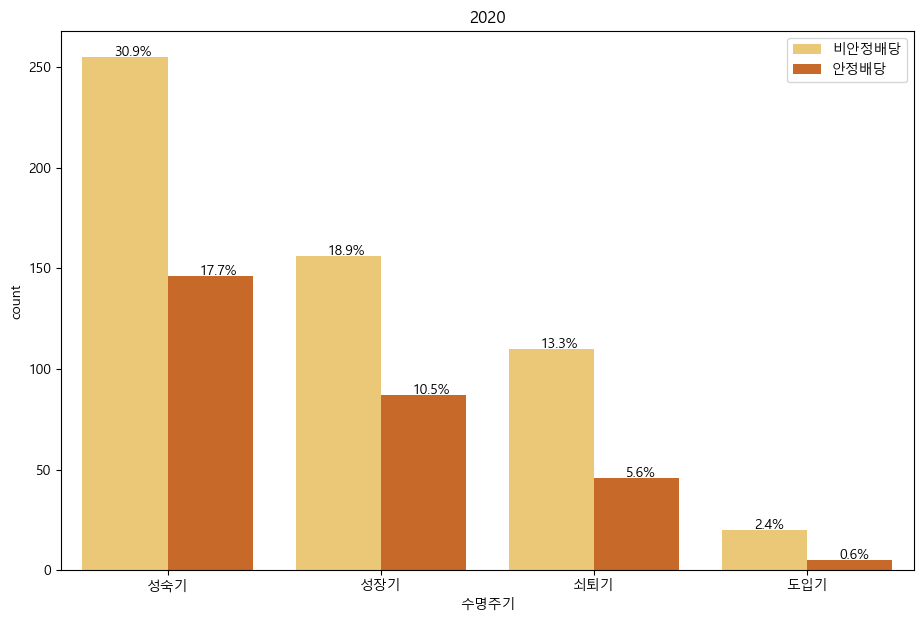

In [9]:

plt.figure(figsize=(11,7))
plt.title('2020')
order = ['성숙기','성장기','쇠퇴기','도입기']
ax = sns.countplot(x='수명주기', hue='target', data=df_2020, palette='YlOrBr',order=order)
plt.legend(['비안정배당', '안정배당'])

total = len(df_2020['수명주기'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

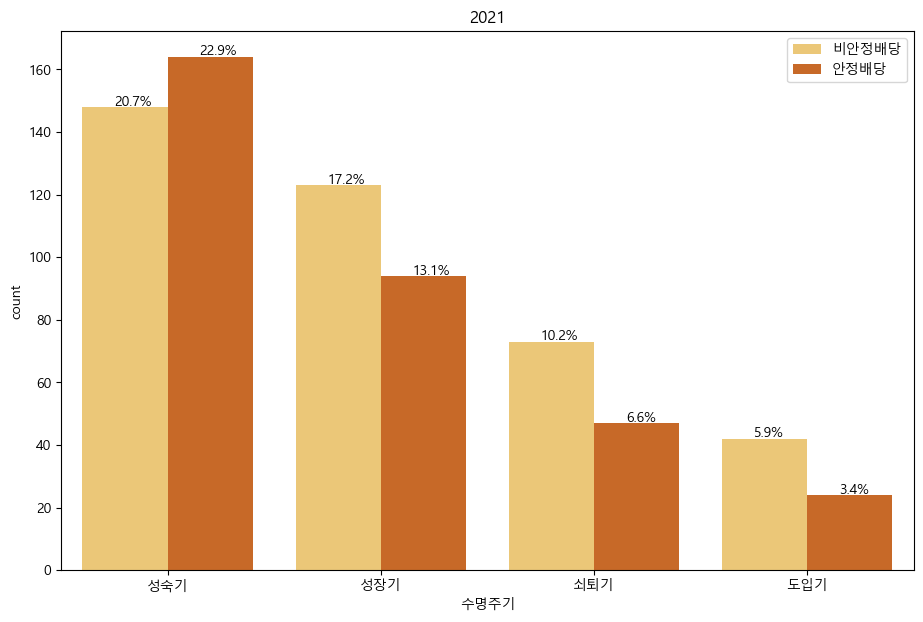

In [10]:

plt.figure(figsize=(11,7))
plt.title('2021')
order = ['성숙기','성장기','쇠퇴기','도입기']
ax = sns.countplot(x='수명주기', hue='target', data=df_2021, palette='YlOrBr',order=order)
plt.legend(['비안정배당', '안정배당'])

total = len(df_2021['수명주기'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

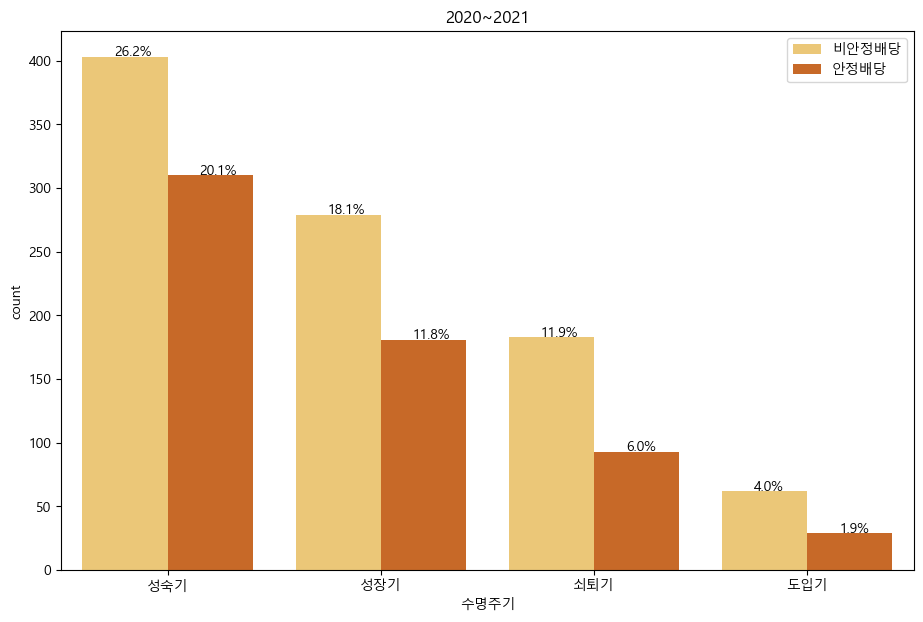

In [11]:

plt.figure(figsize=(11,7))
plt.title('2020~2021')
order = ['성숙기','성장기','쇠퇴기','도입기']
ax = sns.countplot(x='수명주기', hue='target', data=df_전체, palette='YlOrBr',order=order)
plt.legend(['비안정배당', '안정배당'])

total = len(df_전체['수명주기'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

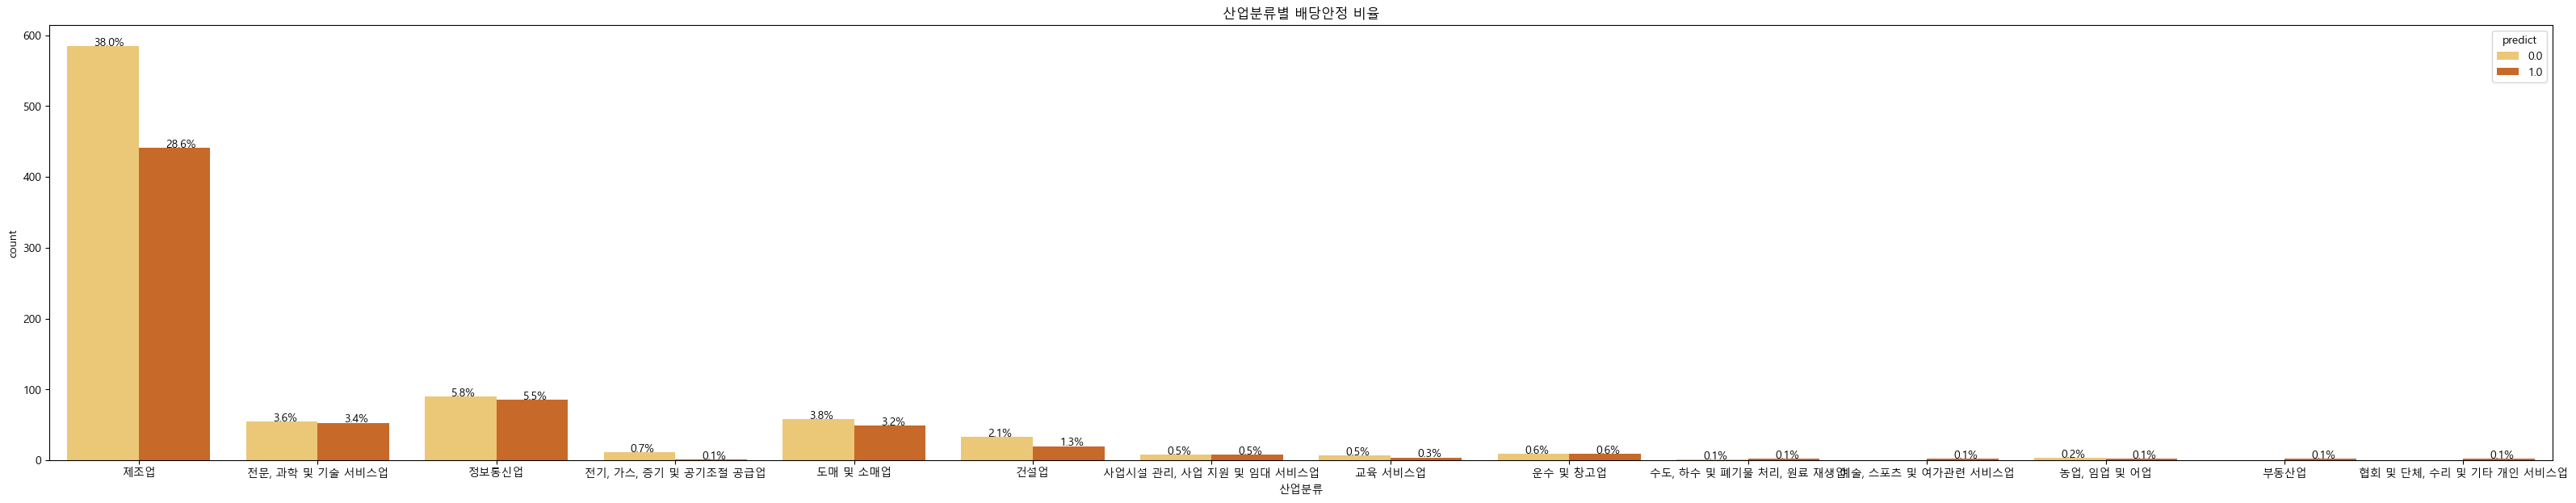

In [12]:
plt.figure(figsize=(40,7))
plt.title('산업분류별 배당안정 비율')
order = ['제조업','정보통신업','전문 과학 및 기술 서비스업','도매 및 소매업','건설업','운수 및 창고업','사업시설 관리,사업지원 및 입대 서비스업',
         '교육 서비스업','전기, 가스, 증기 및 공기조절 공급업','농업, 임업 및 어업','수도, 하수 및 폐기물 처리, 원료 재생업','예술, 스포츠 및 여가관련 서비스업','부동산업',
         '협회 및 단체, 수리 및 기타 개인 서비스업']
ax = sns.countplot(x='산업분류', hue='predict', data=df_전체, palette='YlOrBr')

total = len(df_전체['산업분류'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

In [13]:
df['산업분류'].value_counts()

제조업                         6771
정보통신업                        984
도매 및 소매업                     708
전문, 과학 및 기술 서비스업             657
건설업                          287
운수 및 창고업                     145
사업시설 관리, 사업 지원 및 임대 서비스업     106
전기, 가스, 증기 및 공기조절 공급업         82
교육 서비스업                       73
농업, 임업 및 어업                   36
예술, 스포츠 및 여가관련 서비스업           29
숙박 및 음식점업                     18
수도, 하수 및 폐기물 처리, 원료 재생업       17
협회 및 단체, 수리 및 기타 개인 서비스업       9
부동산업                           8
Name: 산업분류, dtype: int64

c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


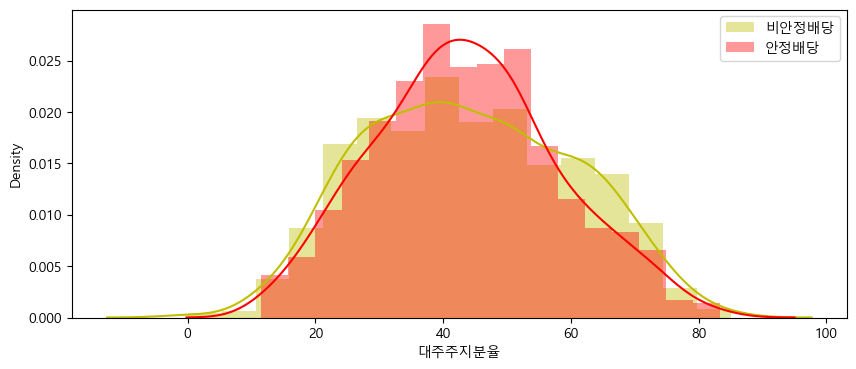

In [14]:
plt.figure(figsize=(10,4))
sns.distplot(df_전체[df_전체["predict"] == 0]['대주주지분율'], color = 'y',label='비안정배당')
sns.distplot(df_전체[df_전체["predict"] == 1]['대주주지분율'], color = 'r',label='안정배당')
plt.legend()
# plt.title("int.rate Distribution")

c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


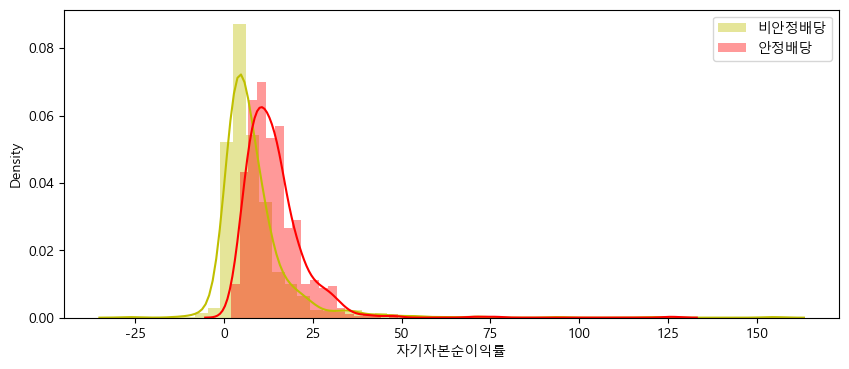

In [15]:
plt.figure(figsize=(10,4))
sns.distplot(df_전체[df_전체["predict"] == 0]['자기자본순이익률'], color = 'y',label='비안정배당')
sns.distplot(df_전체[df_전체["predict"] == 1]['자기자본순이익률'], color = 'r',label='안정배당')
plt.legend()
# plt.title("int.rate Distribution")

c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\msi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


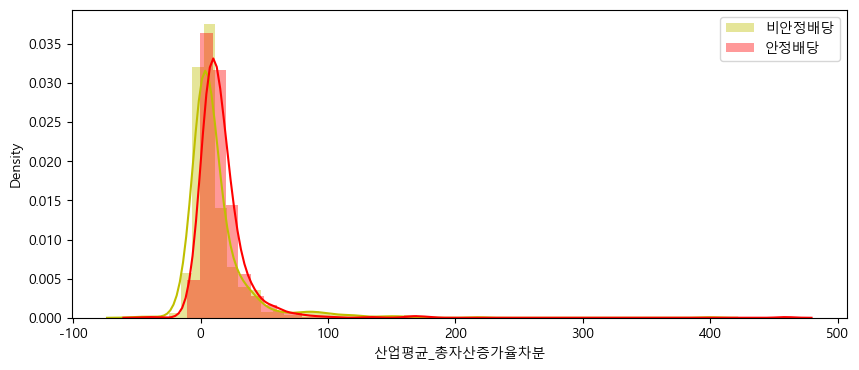

In [16]:
plt.figure(figsize=(10,4))
sns.distplot(df_전체[df_전체["predict"] == 0]['산업평균_총자산증가율차분'], color = 'y',label='비안정배당')
sns.distplot(df_전체[df_전체["predict"] == 1]['산업평균_총자산증가율차분'], color = 'r',label='안정배당')
plt.legend()
# plt.title("int.rate Distribution")

In [17]:
df_1 =df[(df["predict"]==1) & (df["target"]==1)]  
df_1.sort_values('회계년도',ascending=True,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_14508\3494985653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sort_values('회계년도',ascending=True,inplace=True)


In [18]:
df_1.groupby(['기업규모명','산업분류',"회계년도","수명주기"])[['배당성향']].mean()

배당성향
기업규모명 산업분류     회계년도 수명주기            
대기업   건설업      2020 성숙기    10.600801
               2021 성숙기    22.660282
      도매 및 소매업 2020 성숙기   118.482603
                    성장기    29.277889
                    쇠퇴기     4.872670
...                              ...
중소기업  제조업      2020 쇠퇴기    15.859856
               2021 도입기    15.327119
                    성숙기    19.441702
                    성장기    15.949393
                    쇠퇴기    30.882363

[86 rows x 1 columns]

In [19]:
df_2=df_1.groupby(['회사명','거래소코드',"회계년도",'수명주기','기업규모명','산업분류'])[['자기자본순이익률', '외국인지분율', '정상영업이익증가율', '당좌비율', '유보율', '당기순이익(손실)', '대주주지분율','산업평균_총자산증가율차분','배당금_현금','배당성향']].sum()

In [ ]:
df_2

In [20]:
증감_df = df_2.groupby('회사명').diff()
증감_df.dropna(inplace=True)

In [21]:
증감_df[증감_df['배당금_현금']<0]

,,,,,,자기자본순이익률,외국인지분율,정상영업이익증가율,당좌비율,유보율,당기순이익(손실),대주주지분율,산업평균_총자산증가율차분,배당금_현금,배당성향
회사명,거래소코드,회계년도,수명주기,기업규모명,산업분류,,,,,,,,,,


In [74]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
증감_df.reset_index(drop=False,inplace=True)
증감_df.groupby(['기업규모명','산업분류',"회사명",'거래소코드','회계년도','수명주기']).sum().head(100)

자기자본순이익률  외국인지분율  \
기업규모명 산업분류             회사명       거래소코드  회계년도 수명주기                     
대기업   전문, 과학 및 기술 서비스업 씨제이(주)    1040   2021 성숙기       3.77   -2.34   
      정보통신업            (주)케이티    30200  2021 성숙기       4.61   -0.08   
      제조업              (주)DB하이텍  990    2021 성숙기      10.28   -3.51   
                       (주)세아제강   306200 2021 성장기       8.67    2.11   
                       LG이노텍(주)  11070  2021 성숙기      20.75   -7.16   
...                                                     ...     ...   
중소기업  제조업              (주)엠아이텍   179290 2021 성숙기       7.50    1.14   
                       (주)유비쿼스   264450 2021 성숙기       8.17   -0.07   
                       (주)파마리서치  214450 2021 성장기       2.53    4.91   
                       (주)파크시스템스 140860 2021 성숙기      -7.74   12.70   
                       고려제약(주)   14570  2021 성숙기       1.43    0.69   

                                                   정상영업이익증가율   당좌비율      유보율  \
기업규모명 산업분류             회사명       거래소코드  회계년도 수명주기                              
대기업   전문, 과학 및 기술 서비스업 씨제이(주)    1040   2021 성숙기       43.22  -3.48   235.99   
      정보통신업            (주)케이티    30200  2021 성숙기       38.32  -2.89    69.84   
      제조업              (주)DB하이텍  990    2021 성숙기       34.74  67.74   139.73   
                       (주)세아제강   306200 2021 성장기      129.67  -6.99   594.72   
                       LG이노텍(주)  11070  2021 성숙기       16.71 -18.59   749.16   
...                                                      ...    ...      ...   
중소기업  제조업              (주)엠아이텍   179290 2021 성숙기        7.04  16.17    68.48   
                       (주)유비쿼스   264450 2021 성숙기       12.80  30.29   496.80   
                       (주)파마리서치  214450 2021 성장기      -18.32  97.23  1023.57   
                       (주)파크시스템스 140860 2021 성숙기      -69.07  87.05  1020.77   
                       고려제약(주)   14570  2021 성숙기     -221.07  22.88   124.88   

                                                     당기순이익(손실)  대주주지분율  \
기업규모명 산업분류             회사명       거래소코드  회계년도 수명주기                        
대기업   전문, 과학 및 기술 서비스업 씨제이(주)    1040   2021 성숙기    43193294.0    0.00   
      정보통신업            (주)케이티    30200  2021 성숙기   324998000.0    1.00   
      제조업              (주)DB하이텍  990    2021 성숙기   151262336.0    0.03   
                       (주)세아제강   306200 2021 성장기    58335797.0    3.17   
                       LG이노텍(주)  11070  2021 성숙기   603234674.0    0.00   
...                                                        ...     ...   
중소기업  제조업              (주)엠아이텍   179290 2021 성숙기     5706166.0    0.65   
                       (주)유비쿼스   264450 2021 성숙기    12704687.0   -0.36   
                       (주)파마리서치  214450 2021 성장기    15556586.0   -0.38   
                       (주)파크시스템스 140860 2021 성숙기     -760265.0   -1.42   
                       고려제약(주)   14570  2021 성숙기     1682664.0    0.00   

                                                   산업평균_총자산증가율차분       배당금_현금  \
기업규모명 산업분류             회사명       거래소코드  회계년도 수명주기                               
대기업   전문, 과학 및 기술 서비스업 씨제이(주)    1040   2021 성숙기        5.718415   10059280.0   
      정보통신업            (주)케이티    30200  2021 성숙기       11.578415  123906683.0   
      제조업              (주)DB하이텍  990    2021 성숙기       23.288415    4355241.0   
                       (주)세아제강   306200 2021 성장기       14.498415    2800100.0   
                       LG이노텍(주)  11070  2021 성숙기       23.578415   54428366.0   
...                                                          ...          ...   
중소기업  제조업              (주)엠아이텍   179290 2021 성숙기       -3.351585     618882.0   
                       (주)유비쿼스   264450 2021 성숙기        7.108415    2458440.0   
                       (주)파마리서치  214450 2021 성장기       15.238415    1046020.0   
                       (주)파크시스템스 140860 2021 성숙기      -44.291585     522078.0   
                       고려제약(주)   14570  2021 성숙기       -3.541585     198883.0   

                                                        배당성향  
기업규모명 

In [76]:
증감_df[증감_df['배당금_현금']<0]

,index,회사명,거래소코드,회계년도,수명주기,기업규모명,산업분류,자기자본순이익률,외국인지분율,정상영업이익증가율,당좌비율,유보율,당기순이익(손실),대주주지분율,산업평균_총자산증가율차분,배당금_현금,배당성향


In [77]:
증감_df.to_csv('./datasets/insight_data/2020~2021증감.csv',encoding='utf-8-sig')